In [207]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
#upload csv file
df=pd.read_csv('salaries.csv')

In [209]:
#upload csv file
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [210]:
#check null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [211]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [212]:
# checking the value count of categorical column
print(df['experience_level'].value_counts())
print(df['employment_type'].value_counts())
print(df['company_size'].value_counts())

experience_level
SE    42926
MI    21851
EN     6877
EX     1494
Name: count, dtype: int64
employment_type
FT    72808
PT      175
CT      149
FL       16
Name: count, dtype: int64
company_size
M    70536
L     2407
S      205
Name: count, dtype: int64


In [213]:
#dataframe shape
df.shape

(73148, 11)

In [214]:
#onehotencoding
df = pd.get_dummies(df,columns=['experience_level','employment_type','company_size'],drop_first=True)
df.head(3)

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S
0,2025,Data Product Owner,170000,USD,170000,US,0,US,False,False,True,False,True,False,True,False
1,2025,Data Product Owner,110000,USD,110000,US,0,US,False,False,True,False,True,False,True,False
2,2025,Data Product Owner,170000,USD,170000,US,0,US,False,False,True,False,True,False,True,False


In [215]:
#dataframe shape
df.shape

(73148, 16)

In [216]:
df.columns

Index(['work_year', 'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'company_size_M', 'company_size_S'],
      dtype='object')

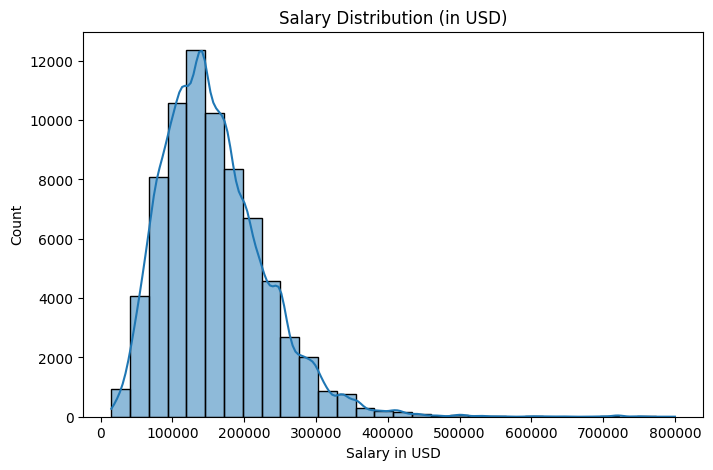

In [217]:
#Salary Distribution (salary_in_usd) - histogram
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution (in USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()

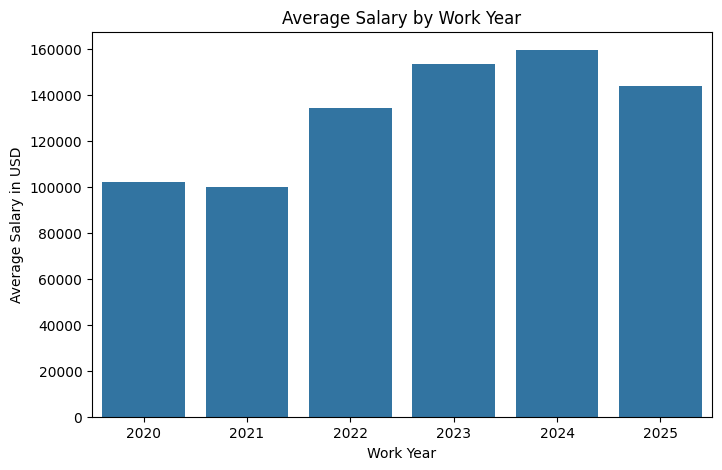

In [218]:
#Average Salary by Work Year - bar plot
plt.figure(figsize=(8,5))
avg_salary_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.barplot(x='work_year', y='salary_in_usd', data=avg_salary_year)
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.show()

In [220]:
#DL model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Add missing expected columns with default 0
expected_columns = [
    'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
    'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
    'company_size_M', 'company_size_S'
]
for col in expected_columns:
    if col not in df.columns:
        df[col] = 0

# Target and features
y = df['salary_in_usd']
X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])

categorical_features = [
    'work_year', 'job_title', 'employee_residence', 'company_location',
    'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
    'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
    'company_size_M', 'company_size_S'
]
numeric_features = ['remote_ratio']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict and evaluate R2 score
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.4f} (Coefficient of Determination, akin to accuracy)')

c:\Users\ACSASS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 15937956864.0000 - mae: 99878.1875 - val_loss: 4086073088.0000 - val_mae: 48017.1445
Epoch 2/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - loss: 4392350208.0000 - mae: 49862.5742 - val_loss: 3835346688.0000 - val_mae: 46453.0781
Epoch 3/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - loss: 4061117952.0000 - mae: 47907.0117 - val_loss: 3783008000.0000 - val_mae: 45694.0195
Epoch 4/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 4248959488.0000 - mae: 48325.6367 - val_loss: 3763326464.0000 - val_mae: 45402.1328
Epoch 5/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - loss: 4133442304.0000 - mae: 47852.7578 - val_loss: 3711363072.0000 - val_mae: 45564.8867
Epoch 6/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 4017628928.0000 - mae: 47139.6484 - val_loss: 3698647808.0000 - val_mae: 45508.4883
Epoch 7/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - loss: 4054798080.0000 - mae: 47464.1406 - val_loss: 3

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            73148 non-null  int64 
 1   job_title            73148 non-null  object
 2   salary               73148 non-null  int64 
 3   salary_currency      73148 non-null  object
 4   salary_in_usd        73148 non-null  int64 
 5   employee_residence   73148 non-null  object
 6   remote_ratio         73148 non-null  int64 
 7   company_location     73148 non-null  object
 8   experience_level_EX  73148 non-null  bool  
 9   experience_level_MI  73148 non-null  bool  
 10  experience_level_SE  73148 non-null  bool  
 11  employment_type_FL   73148 non-null  bool  
 12  employment_type_FT   73148 non-null  bool  
 13  employment_type_PT   73148 non-null  bool  
 14  company_size_M       73148 non-null  bool  
 15  company_size_S       73148 non-null  bool  
dtypes: b

In [223]:
df=df.drop(columns=['job_title','salary_currency','employee_residence','company_location'])

In [ ]:
#ML MODEL
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

x=df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']

#linearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
lr_accuracy=r2_score(y_test,y_pred_lr)
mse=mean_squared_error(y_test,y_pred_lr)
rmse=np.sqrt(mse)

#RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=200,max_depth=15,random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
rf_accuracy=r2_score(y_test,y_pred_rf)

#Decision tree regressor
dt_model=DecisionTreeRegressor(max_depth=None,random_state=42)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
dt_accuracy=r2_score(y_test,y_pred_dt)


print("LinerRegression Accuracy :",lr_accuracy)
print("mean_squared_error",mse)
print("root mean squareerror",rmse)

print(" ")
print("RandomForestRegressor performance")
print("RandomForestRegressor accuracy",rf_accuracy)

print(" ")
print("Dection Tree Regression")
print('Decision Tree Regression',dt_accuracy)

LinerRegression Accuracy : -0.26040585285524354
mean_squared_error 6844337108.956111
root mean squareerror 82730.50893688561
 
RandomForestRegressor performance
RandomForestRegressor accuracy 0.9902300503634958
 
Dection Tree Regression
Decision Tree Regression 0.9887331306438216


In [ ]:
#STACKED HYBRID MODEL
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

x=df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']

#linearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_base,x_holdout,y_base,y_holdout=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

rf=RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42)
gbr=GradientBoostingRegressor(n_estimators=200,max_depth=5,random_state=42)

rf.fit(x_base,y_base)
gbr.fit(x_base,y_base)

rf_pred=rf.predict(x_holdout)
gbr_pred=gbr.predict(x_holdout)
stacked_pred=np.column_stack((rf_pred,gbr_pred))

meta_model=LinearRegression()
meta_model.fit(stacked_pred,y_holdout)

rf_test_pred=rf.predict(x_test)
gbr_test_pred=gbr.predict(x_test)
stacked_test=np.column_stack((rf_test_pred,gbr_test_pred))

final_pred=meta_model.predict(stacked_test)
r2=r2_score(y_test,final_pred)


print('hybrid model accuracy:{:.2f}%',format(r2*100))
print('mean_squared_error',mse)

hybrid model accuracy:{:.2f}% 99.10016788886996
mean_squared_error 6844337108.956111
